C:\Users\luizb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[   1, 2000]], dtype=int64)

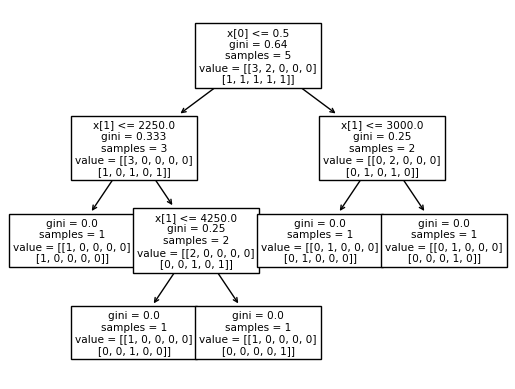

In [71]:
import pandas as pd
import numpy as np
 
from sklearn import tree
 
estado_civil = [0,1,0,1,0]
renda_mensal = [1000,2000,3500,4000,5000]
aprovado = [0,1,0,1,1]
 
dfClientes = pd.DataFrame({'estado_civil': estado_civil,
              'renda_mensal': renda_mensal,
              'aprovado': aprovado
              })
 
preditivas = dfClientes.iloc[:,:2]
 
target = dfClientes.iloc[:,:-1]
 
arvore = tree.DecisionTreeClassifier()
 
arvore.fit(preditivas,target)
 
tree.plot_tree(arvore)
 
arvore.predict([[1,1000]])

In [72]:
import pandas as pd

arquivo = pd.read_csv('Vinhos.csv')

arquivo.head()

# 0 para tinto e 1 para branco
 



,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [74]:
arquivo['style'] = arquivo['style'].replace('white', 1).infer_objects(copy=False)
arquivo['style'] = arquivo['style'].replace('red', 0).infer_objects(copy=False)

#target
y = arquivo['style']

#preditivas
x = arquivo.drop('style', axis = 1)

C:\Users\luizb\AppData\Local\Temp\ipykernel_304\1230868720.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  arquivo['style'] = arquivo['style'].replace('red', 0).infer_objects(copy=False)


In [75]:
from sklearn.model_selection import train_test_split

#separar 70% dos dados em treino e 30% para teste

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.9)

#mostra a quantidade de linhas e colunas de cada dataset
print(arquivo.shape, x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape)


(6497, 13) (649, 12) (5848, 12) (649,) (5848,)


In [76]:
from sklearn.ensemble import ExtraTreesClassifier

modelo = ExtraTreesClassifier()

modelo.fit(x_treino, y_treino)

resultado = modelo.score(x_teste, y_teste)

#Acurácia: confiabilidade do algoritmo
print("A acuracia é:", resultado)

A acuracia é: 0.9931600547195623


In [78]:
#print("A acuracia é:", resultado)

#y_teste[600:605]

previsoes = modelo.predict(x_teste[600:605])

print(previsoes)

[1 1 1 1 1]
